In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic
## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [7]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2) # you have to give it an initial guess x0

In [8]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [9]:
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$$$-x-2y+6 \geq 0$$$$-x + 2y + 2 \geq 0$$$$x \geq 0 $$$$y \geq 0 $$
drawing
2D function takes in vector $x$
Constraints must be specified as $g_i(x) \geq 0$
Bounds specified as rectangular

In [10]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) # conditions
bnds = ((0, None), (0, None))  # bounds for x,y >= 0
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

# x[0] is the first dimension, x[1] is the second dimension

In [11]:
res.x

array([1.4, 1.7])

Note use of different techniques for different problems.

In [14]:
minimize?
# Gives different ways to use minimize

# Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

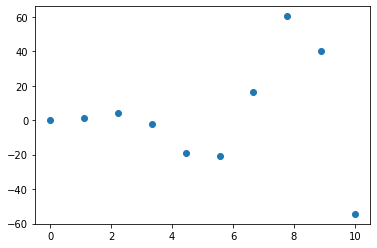

In [15]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [16]:
from scipy.interpolate import interp1d

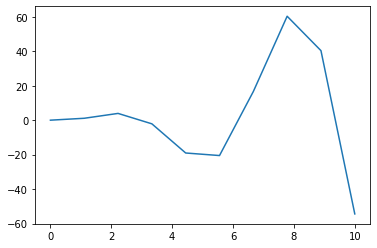

In [19]:
f = interp1d(x, y, kind='linear') 
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

In [26]:
f = interp1d(x, y, kind='cubic') # interpolation used to get value of points in between
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

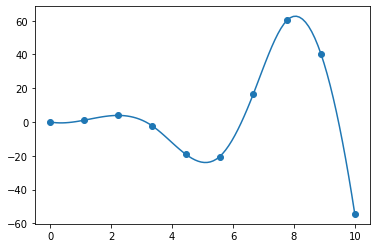

In [27]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

# Curve Fitting

In [22]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

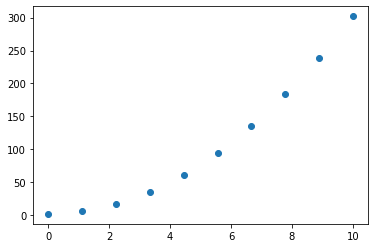

In [23]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [28]:
# fitting != interpolation
# fitting used to get values of a and b starting from an assumption about the curve
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [29]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

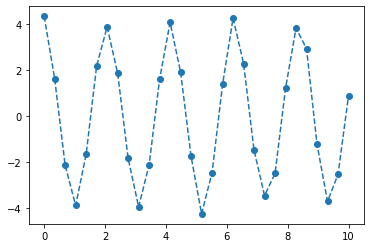

In [30]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is 
$\omega = 2 \pi (1/2) = \pi$
$A=4$
$\phi = 0$

In [31]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.99899521, 0.10411352])

In [32]:
A, w, phi = popt

In [33]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

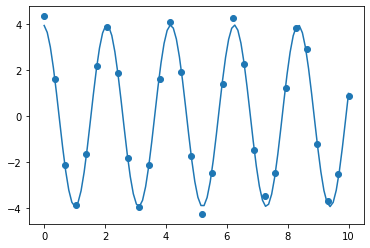

In [36]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

In [37]:
pcov # error on the parameters contained in main diagonal squared

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [38]:
np.diag(pcov) # gives variance of trhe three parameters

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

In [40]:
np.sqrt(np.diag(pcov)) # gives error (standard deviation) on the three parameters

array([0.05117448, 0.00430857, 0.02575701])

# Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

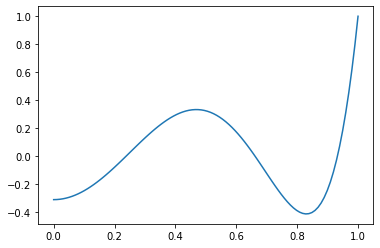

In [41]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

Laplace's Equation in Polar Coordinates

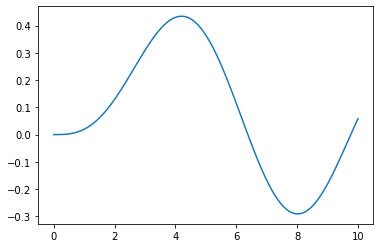

In [42]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

# Calculus

## Differentiation

In [43]:
from scipy.misc import derivative

In [44]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

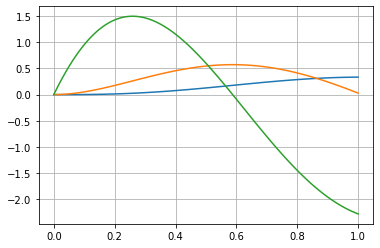

In [45]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6)) # dx represents a small step
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) # n=2 represents the second derivative
plt.grid()


# Integration

Single Integrals 
$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [46]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [47]:
integral

0.14558175869954834

In [48]:
integral_error

1.6162822047366225e-15

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [49]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [50]:
integral

0.590090324408853

In [51]:
integral_error

2.0545915475811425e-14

In [ ]:
nquad? # gives info about higher dimensional integrals

# Differential Equations

### First Order ODEs

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [52]:
from scipy.integrate import odeint

All information about differential equation

In [53]:
def dvdt(v, t):
    return 3*v**2 - 5 # defining dv/dt, here we set alpha=3 and beta=5 as arbitrary parameters
v0 = 0

In [58]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)
sol #not printing because sol array is long

In [55]:
v_sol = sol.T[0] # here we take the first element of the transpose of the sol array 

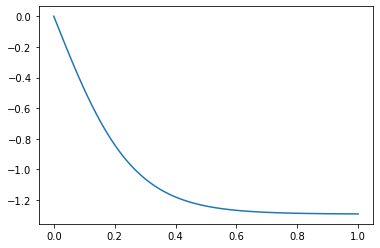

In [56]:
plt.plot(t, v_sol)

### Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$
Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [59]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [60]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [61]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

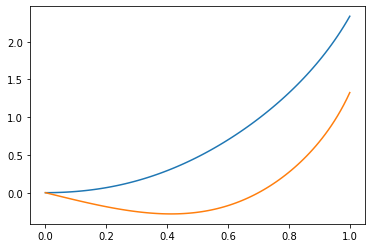

In [62]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

### Second Order ODEs

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$
Scipy can only solve coupled first order ODEs, but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$$$d \theta / dt = \omega $$
Let $S = (\theta, \omega)$

In [63]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [64]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

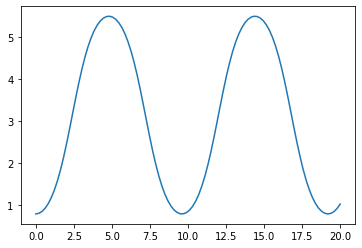

In [65]:
plt.plot(t, theta)
plt.show()

# Fourier Transforms
The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
$k/N$ represents a specific frequency (dimensionless)
can be converted to a frequency (Hz) if you know the spacing in $x$

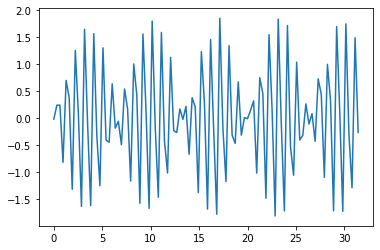

In [66]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(x, y)

In [69]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)
xf = fftfreq(N, np.diff(x)[0])

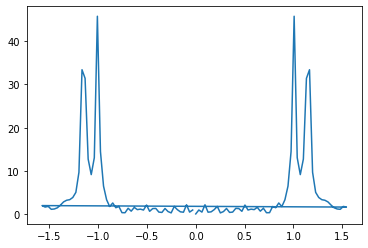

In [70]:
plt.plot(xf, np.abs(yf))
plt.show()

In [71]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)[:N//2] # goes up to N integer divided by 2 to avoid negative frequency value
xf = fftfreq(N, np.diff(x)[0])[:N//2] # gives the frequencies corresponding to the frequency values in y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x)), np.diff(x)[0] represents the delta x 

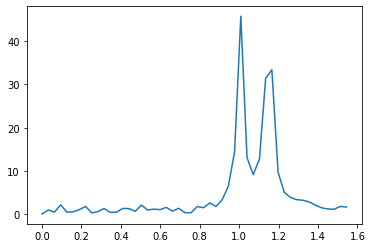

In [74]:
plt.plot(xf, np.abs(yf))
plt.show()

# Examples
Example 1. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$
Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work.

Then $x=A\sin(\pi t/10)$, $y=t$, and

$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)}$$$$\vec{F} \cdot \frac{d\vec{r}}{dt} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10) +1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t/10) +1)^2 $$
so that

$$ E = \int_{0}^{10} \left(5\sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10) +100)^2}  \right) dt$$

In [79]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x # no need for method="CG"

array([1.42591231])

Example 2: Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t)) $$
where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:

In [81]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

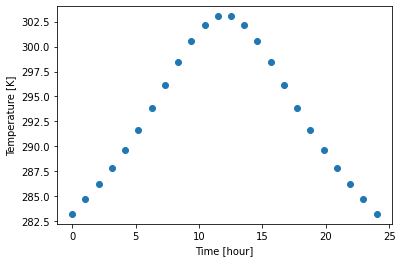

In [82]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [83]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [84]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [85]:
sol = odeint(dTdt, T0, times).T[0]

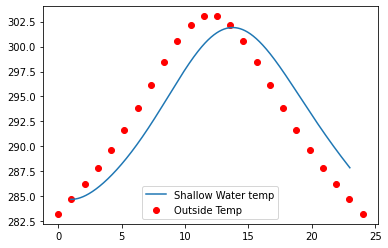

In [86]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

# Linear Algebra
## Basics
Triangular matrices

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [87]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices (matrices with constant diagonals)

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1, 2, 2, 5 \end{bmatrix} $$

In [88]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

# Eigenvalue Problems
Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [89]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [92]:
# matrix is both td = 3*np.ones(4)
d = 3*np.ones(4) # main diagonal
e = -1*np.ones(3) # off diagonal
w, v = eigh_tridiagonal(d, e) # evalues and evectors


In [93]:
w

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [94]:
v

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [95]:
# To get first evector
v.T[0]

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [96]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A # to construct the matrix

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [97]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [99]:
w[0] * v.T[0] # should be equal to A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

# Special Matrices
Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [100]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

oeplitz matrices (matrices with constant diagonals)

In [101]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

# Decompositions
LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [102]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)

Choleski decomposition: find matrix $C$ such that $A = CC^T$

In [103]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [104]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [106]:
C@C.T

array([[1. , 0.2],
       [0.2, 1. ]])

In [107]:

A

array([[1. , 0.2],
       [0.2, 1. ]])

Sparse Matrices
Matrices that contain lots of zeros (so lots of space can be reduced)

A Useful Example:

The second derivative of $f(x_i) \equiv f_i$ is approximated as $\frac{d^2 f_i}{dx^2} \approx \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x^2}$. Suppose we have $f_0, ... f_4$ and $f_0=f_4=0$ (boundary conditions). Then the second derivative is approximated as

$$ D \begin{bmatrix} f_1 \\ f_2 \\ f_3\end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2   1   0 \\ 1   -2   1 \\ 0   1   -2 \end{bmatrix} $$
In 2D our function can be discretized on a grid

$$\begin{bmatrix} 0   0   0   0   0 \\ 0   f_{11}   f_{12}   f_{13}   0 \\ 0   f_{21}   f_{22}   f_{23}   0 \\ 0   f_{31}   f_{32}   f_{33}   0 \\ 0   0   0   0   0 \end{bmatrix} $$
but when doing this sort of work, its always better to store information in a vector

$$\begin{bmatrix} 0   0   0   0   0 \\ 0   f_{11}   f_{12}   f_{13}   0 \\ 0   f_{21}   f_{22}   f_{23}   0 \\ 0   f_{31}   f_{32}   f_{33}   0 \\ 0   0   0   0   0 \end{bmatrix} \to \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$$
What does the 2D laplacian look like? It turns out it is the "Kroncker sum" of our original matrix. The second derivative is given by

$$(D \oplus D) \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2   1   0 \\ 1   -2   1 \\ 0   1   -2 \end{bmatrix} $$
Note that even though $D$ is 3x3, $D \oplus D$ is 9x9.

In [108]:
from scipy.linalg import kron # kronecker product, NOT sum
N= 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

Too big for any reasonable calculation! But can use sparse matrices

In [110]:
from scipy import sparse
N=100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)

In [111]:
T

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [1]:
a_list = list(range(1, 5))

print(a_list)

[1, 2, 3, 4]
